<a href="https://colab.research.google.com/github/imraunav/Computer-vision-EE511/blob/main/3_layer_mlp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD, Adam
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor, Lambda, Compose
import numpy as np
from tqdm import tqdm
# from tqdm.notebook import tqdm
from torchsummary import summary

In [ ]:
train_dataset = MNIST(root = './',
      train = True,
      transform = ToTensor(),
      target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)),
      download = True)
test_dataset = MNIST(root = './',
      train = False,
      transform = ToTensor(),
      target_transform = Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)),
      download = False)

100%|██████████| 9912422/9912422 [00:00<00:00, 153590469.04it/s]

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 42819262.57it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 97907490.36it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 8028035.72it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
train_loader = DataLoader(train_dataset, batch_size = 64, shuffle = True)
test_loader = DataLoader(test_dataset)

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Using device: ", device)

Using device:  cuda


In [ ]:
class MLP(nn.Module):
  def __init__(self, num_classes = 10):
    super().__init__()
    self.l1 = nn.Linear(28*28, 20)
    self.l2 = nn.Linear(20, 20)
    self.l3 = nn.Linear(20, num_classes)
  def forward(self, x):
    x = x.view(x.size(0), 28*28)
    x = F.sigmoid(self.l1(x))
    x = F.sigmoid(self.l2(x))
    return F.sigmoid(self.l3(x))


In [ ]:
model = MLP().to(device)
summary(model, (28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 20]          15,700
            Linear-2                   [-1, 20]             420
            Linear-3                   [-1, 10]             210
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.06
Estimated Total Size (MB): 0.07
----------------------------------------------------------------


In [ ]:
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.5)
crit = nn.MSELoss()

In [ ]:
max_epoch = 100
train_loss = []
val_loss = []
# init_patience = 5
# patience = init_patience
# tol = 0.001

for epoch in range(max_epoch):
  print("Epoch:", epoch+1, end=" ")
  model.train()
  running_loss = 0
  nbatch = 0
  for batch in tqdm(train_loader):
    img, target = batch
    img = img.to(device)
    target = target.to(device)
    optimizer.zero_grad()

    pred = model(img)
    loss = crit(pred, target)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()
    nbatch += 1
  train_loss.append(running_loss/nbatch)

  runnging_loss = 0
  nbatch = 0
  for batch in test_loader:
    img, target = batch
    img = img.to(device)
    target = target.to(device)

    pred = model(img)
    loss = crit(pred, target)
    running_loss += loss.item()
    nbatch += 1
  val_loss.append(running_loss/nbatch)
  print(f"Train loss: {train_loss[-1]:.5f}, Val loss: {val_loss[-1]:.5f}")
  # if epoch < 20:
  #   continue
  # if abs(val_loss[-2] - val_loss[-1]) < tol:
  #   patience -= 1
  # else:
  #   patience = init_patience
  # if patience == 0:
  #   print("Early stopping")
  #   break


Epoch: 1 

100%|██████████| 938/938 [00:10<00:00, 86.18it/s]


Train loss: 0.15241, Val loss: 0.12101
Epoch: 2 

100%|██████████| 938/938 [00:10<00:00, 85.31it/s]


Train loss: 0.09845, Val loss: 0.10316
Epoch: 3 

100%|██████████| 938/938 [00:10<00:00, 93.54it/s]


Train loss: 0.09235, Val loss: 0.09998
Epoch: 4 

100%|██████████| 938/938 [00:10<00:00, 87.48it/s]


Train loss: 0.09085, Val loss: 0.09903
Epoch: 5 

100%|██████████| 938/938 [00:10<00:00, 85.90it/s]


Train loss: 0.09033, Val loss: 0.09866
Epoch: 6 

100%|██████████| 938/938 [00:09<00:00, 98.00it/s]


Train loss: 0.09012, Val loss: 0.09851
Epoch: 7 

100%|██████████| 938/938 [00:10<00:00, 90.13it/s]


Train loss: 0.09002, Val loss: 0.09843
Epoch: 8 

100%|██████████| 938/938 [00:10<00:00, 90.32it/s]


Train loss: 0.08998, Val loss: 0.09840
Epoch: 9 

100%|██████████| 938/938 [00:10<00:00, 92.36it/s]


Train loss: 0.08995, Val loss: 0.09837
Epoch: 10 

100%|██████████| 938/938 [00:10<00:00, 93.59it/s]


Train loss: 0.08993, Val loss: 0.09836
Epoch: 11 

100%|██████████| 938/938 [00:10<00:00, 86.68it/s]


Train loss: 0.08992, Val loss: 0.09835
Epoch: 12 

100%|██████████| 938/938 [00:10<00:00, 89.07it/s]


Train loss: 0.08992, Val loss: 0.09834
Epoch: 13 

100%|██████████| 938/938 [00:09<00:00, 95.75it/s] 


Train loss: 0.08991, Val loss: 0.09834
Epoch: 14 

100%|██████████| 938/938 [00:10<00:00, 91.90it/s]


Train loss: 0.08991, Val loss: 0.09833
Epoch: 15 

100%|██████████| 938/938 [00:11<00:00, 84.94it/s]


Train loss: 0.08990, Val loss: 0.09833
Epoch: 16 

100%|██████████| 938/938 [00:10<00:00, 85.54it/s]


Train loss: 0.08990, Val loss: 0.09832
Epoch: 17 

100%|██████████| 938/938 [00:10<00:00, 90.56it/s]


Train loss: 0.08989, Val loss: 0.09832
Epoch: 18 

100%|██████████| 938/938 [00:10<00:00, 88.90it/s]


Train loss: 0.08989, Val loss: 0.09831
Epoch: 19 

100%|██████████| 938/938 [00:10<00:00, 88.25it/s]


Train loss: 0.08988, Val loss: 0.09831
Epoch: 20 

100%|██████████| 938/938 [00:09<00:00, 95.26it/s]


Train loss: 0.08988, Val loss: 0.09830
Epoch: 21 

100%|██████████| 938/938 [00:10<00:00, 87.62it/s]


Train loss: 0.08987, Val loss: 0.09829
Epoch: 22 

100%|██████████| 938/938 [00:11<00:00, 85.23it/s]


Train loss: 0.08987, Val loss: 0.09829
Epoch: 23 

100%|██████████| 938/938 [00:10<00:00, 88.36it/s]


Train loss: 0.08986, Val loss: 0.09828
Epoch: 24 

100%|██████████| 938/938 [00:10<00:00, 90.60it/s]


Train loss: 0.08986, Val loss: 0.09828
Epoch: 25 

100%|██████████| 938/938 [00:10<00:00, 87.55it/s]


Train loss: 0.08985, Val loss: 0.09827
Epoch: 26 

100%|██████████| 938/938 [00:10<00:00, 88.06it/s]


Train loss: 0.08985, Val loss: 0.09827
Epoch: 27 

100%|██████████| 938/938 [00:09<00:00, 94.92it/s]


Train loss: 0.08984, Val loss: 0.09826
Epoch: 28 

100%|██████████| 938/938 [00:11<00:00, 84.47it/s]


Train loss: 0.08984, Val loss: 0.09826
Epoch: 29 

100%|██████████| 938/938 [00:10<00:00, 85.74it/s]


Train loss: 0.08983, Val loss: 0.09825
Epoch: 30 

100%|██████████| 938/938 [00:10<00:00, 91.90it/s]


Train loss: 0.08983, Val loss: 0.09824
Epoch: 31 

100%|██████████| 938/938 [00:10<00:00, 86.37it/s]


Train loss: 0.08982, Val loss: 0.09824
Epoch: 32 

100%|██████████| 938/938 [00:11<00:00, 84.34it/s]


Train loss: 0.08982, Val loss: 0.09823
Epoch: 33 

100%|██████████| 938/938 [00:10<00:00, 87.97it/s]


Train loss: 0.08981, Val loss: 0.09822
Epoch: 34 

100%|██████████| 938/938 [00:10<00:00, 92.59it/s]


Train loss: 0.08981, Val loss: 0.09822
Epoch: 35 

100%|██████████| 938/938 [00:11<00:00, 84.01it/s]


Train loss: 0.08980, Val loss: 0.09821
Epoch: 36 

100%|██████████| 938/938 [00:11<00:00, 84.12it/s]


Train loss: 0.08979, Val loss: 0.09821
Epoch: 37 

100%|██████████| 938/938 [00:10<00:00, 90.45it/s]


Train loss: 0.08979, Val loss: 0.09820
Epoch: 38 

100%|██████████| 938/938 [00:10<00:00, 86.53it/s]


Train loss: 0.08978, Val loss: 0.09819
Epoch: 39 

100%|██████████| 938/938 [00:11<00:00, 83.56it/s]


Train loss: 0.08978, Val loss: 0.09818
Epoch: 40 

100%|██████████| 938/938 [00:09<00:00, 95.58it/s]


Train loss: 0.08977, Val loss: 0.09818
Epoch: 41 

100%|██████████| 938/938 [00:10<00:00, 88.99it/s]


Train loss: 0.08976, Val loss: 0.09817
Epoch: 42 

100%|██████████| 938/938 [00:10<00:00, 86.65it/s]


Train loss: 0.08976, Val loss: 0.09816
Epoch: 43 

100%|██████████| 938/938 [00:10<00:00, 87.25it/s]


Train loss: 0.08975, Val loss: 0.09816
Epoch: 44 

100%|██████████| 938/938 [00:10<00:00, 93.78it/s]


Train loss: 0.08974, Val loss: 0.09815
Epoch: 45 

100%|██████████| 938/938 [00:10<00:00, 87.71it/s] 


Train loss: 0.08974, Val loss: 0.09814
Epoch: 46 

100%|██████████| 938/938 [00:10<00:00, 87.87it/s]


Train loss: 0.08973, Val loss: 0.09813
Epoch: 47 

100%|██████████| 938/938 [00:09<00:00, 94.83it/s] 


Train loss: 0.08972, Val loss: 0.09812
Epoch: 48 

100%|██████████| 938/938 [00:10<00:00, 88.90it/s]


Train loss: 0.08972, Val loss: 0.09812
Epoch: 49 

100%|██████████| 938/938 [00:10<00:00, 89.27it/s] 


Train loss: 0.08971, Val loss: 0.09811
Epoch: 50 

100%|██████████| 938/938 [00:10<00:00, 90.38it/s]


Train loss: 0.08970, Val loss: 0.09810
Epoch: 51 

100%|██████████| 938/938 [00:10<00:00, 92.87it/s]


Train loss: 0.08969, Val loss: 0.09809
Epoch: 52 

100%|██████████| 938/938 [00:10<00:00, 88.62it/s] 


Train loss: 0.08968, Val loss: 0.09808
Epoch: 53 

100%|██████████| 938/938 [00:10<00:00, 88.29it/s]


Train loss: 0.08968, Val loss: 0.09807
Epoch: 54 

100%|██████████| 938/938 [00:09<00:00, 94.93it/s] 


Train loss: 0.08967, Val loss: 0.09806
Epoch: 55 

100%|██████████| 938/938 [00:10<00:00, 91.10it/s]


Train loss: 0.08966, Val loss: 0.09805
Epoch: 56 

100%|██████████| 938/938 [00:10<00:00, 88.86it/s] 


Train loss: 0.08965, Val loss: 0.09804
Epoch: 57 

100%|██████████| 938/938 [00:10<00:00, 88.45it/s] 


Train loss: 0.08964, Val loss: 0.09803
Epoch: 58 

100%|██████████| 938/938 [00:09<00:00, 98.25it/s]


Train loss: 0.08963, Val loss: 0.09802
Epoch: 59 

100%|██████████| 938/938 [00:10<00:00, 88.67it/s]


Train loss: 0.08962, Val loss: 0.09801
Epoch: 60 

100%|██████████| 938/938 [00:10<00:00, 88.74it/s]


Train loss: 0.08961, Val loss: 0.09800
Epoch: 61 

100%|██████████| 938/938 [00:10<00:00, 92.19it/s]


Train loss: 0.08960, Val loss: 0.09799
Epoch: 62 

100%|██████████| 938/938 [00:10<00:00, 93.38it/s]


Train loss: 0.08959, Val loss: 0.09798
Epoch: 63 

100%|██████████| 938/938 [00:10<00:00, 88.17it/s]


Train loss: 0.08958, Val loss: 0.09797
Epoch: 64 

100%|██████████| 938/938 [00:10<00:00, 90.03it/s]


Train loss: 0.08957, Val loss: 0.09795
Epoch: 65 

100%|██████████| 938/938 [00:09<00:00, 97.42it/s] 


Train loss: 0.08956, Val loss: 0.09794
Epoch: 66 

100%|██████████| 938/938 [00:10<00:00, 90.94it/s]


Train loss: 0.08955, Val loss: 0.09793
Epoch: 67 

100%|██████████| 938/938 [00:10<00:00, 88.11it/s] 


Train loss: 0.08954, Val loss: 0.09792
Epoch: 68 

100%|██████████| 938/938 [00:10<00:00, 89.36it/s]


Train loss: 0.08953, Val loss: 0.09790
Epoch: 69 

100%|██████████| 938/938 [00:09<00:00, 99.19it/s]


Train loss: 0.08952, Val loss: 0.09789
Epoch: 70 

100%|██████████| 938/938 [00:10<00:00, 87.70it/s]


Train loss: 0.08950, Val loss: 0.09788
Epoch: 71 

100%|██████████| 938/938 [00:10<00:00, 88.88it/s]


Train loss: 0.08949, Val loss: 0.09786
Epoch: 72 

100%|██████████| 938/938 [00:10<00:00, 92.77it/s] 


Train loss: 0.08948, Val loss: 0.09785
Epoch: 73 

100%|██████████| 938/938 [00:09<00:00, 94.31it/s]


Train loss: 0.08946, Val loss: 0.09783
Epoch: 74 

100%|██████████| 938/938 [00:10<00:00, 89.55it/s] 


Train loss: 0.08945, Val loss: 0.09781
Epoch: 75 

100%|██████████| 938/938 [00:10<00:00, 88.49it/s] 


Train loss: 0.08944, Val loss: 0.09780
Epoch: 76 

100%|██████████| 938/938 [00:10<00:00, 92.76it/s] 


Train loss: 0.08942, Val loss: 0.09778
Epoch: 77 

100%|██████████| 938/938 [00:10<00:00, 91.25it/s]


Train loss: 0.08941, Val loss: 0.09776
Epoch: 78 

100%|██████████| 938/938 [00:10<00:00, 89.83it/s]


Train loss: 0.08939, Val loss: 0.09775
Epoch: 79 

100%|██████████| 938/938 [00:10<00:00, 89.40it/s]


Train loss: 0.08937, Val loss: 0.09773
Epoch: 80 

100%|██████████| 938/938 [00:09<00:00, 97.36it/s]


Train loss: 0.08936, Val loss: 0.09771
Epoch: 81 

100%|██████████| 938/938 [00:10<00:00, 89.61it/s]


Train loss: 0.08934, Val loss: 0.09769
Epoch: 82 

100%|██████████| 938/938 [00:10<00:00, 90.08it/s]


Train loss: 0.08932, Val loss: 0.09767
Epoch: 83 

100%|██████████| 938/938 [00:10<00:00, 91.12it/s] 


Train loss: 0.08930, Val loss: 0.09765
Epoch: 84 

100%|██████████| 938/938 [00:10<00:00, 93.80it/s]


Train loss: 0.08929, Val loss: 0.09763
Epoch: 85 

100%|██████████| 938/938 [00:10<00:00, 88.72it/s] 


Train loss: 0.08927, Val loss: 0.09761
Epoch: 86 

100%|██████████| 938/938 [00:10<00:00, 87.97it/s]


Train loss: 0.08925, Val loss: 0.09758
Epoch: 87 

100%|██████████| 938/938 [00:09<00:00, 94.64it/s]


Train loss: 0.08922, Val loss: 0.09756
Epoch: 88 

100%|██████████| 938/938 [00:10<00:00, 90.29it/s]


Train loss: 0.08920, Val loss: 0.09753
Epoch: 89 

100%|██████████| 938/938 [00:10<00:00, 87.67it/s]


Train loss: 0.08918, Val loss: 0.09751
Epoch: 90 

100%|██████████| 938/938 [00:10<00:00, 90.64it/s] 


Train loss: 0.08916, Val loss: 0.09748
Epoch: 91 

100%|██████████| 938/938 [00:09<00:00, 97.59it/s]


Train loss: 0.08913, Val loss: 0.09746
Epoch: 92 

100%|██████████| 938/938 [00:10<00:00, 88.71it/s]


Train loss: 0.08911, Val loss: 0.09743
Epoch: 93 

100%|██████████| 938/938 [00:10<00:00, 87.96it/s]


Train loss: 0.08908, Val loss: 0.09740
Epoch: 94 

100%|██████████| 938/938 [00:10<00:00, 91.50it/s] 


Train loss: 0.08906, Val loss: 0.09737
Epoch: 95 

100%|██████████| 938/938 [00:09<00:00, 95.05it/s]


Train loss: 0.08903, Val loss: 0.09734
Epoch: 96 

100%|██████████| 938/938 [00:10<00:00, 89.23it/s]


Train loss: 0.08900, Val loss: 0.09730
Epoch: 97 

100%|██████████| 938/938 [00:10<00:00, 88.26it/s] 


Train loss: 0.08897, Val loss: 0.09727
Epoch: 98 

100%|██████████| 938/938 [00:10<00:00, 93.51it/s]


Train loss: 0.08894, Val loss: 0.09723
Epoch: 99 

100%|██████████| 938/938 [00:10<00:00, 89.41it/s]


Train loss: 0.08891, Val loss: 0.09720
Epoch: 100 

100%|██████████| 938/938 [00:10<00:00, 90.13it/s] 


Train loss: 0.08887, Val loss: 0.09716


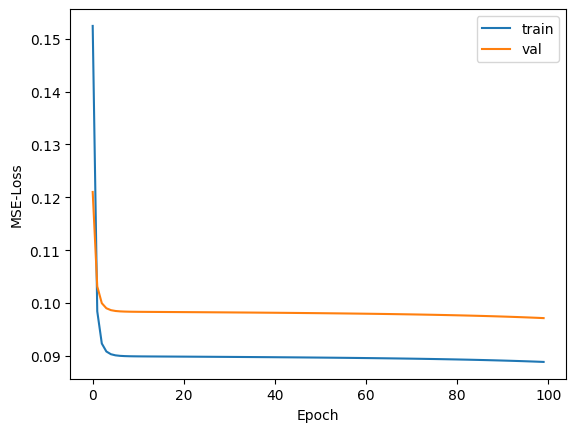

In [ ]:
from matplotlib import pyplot as plt

plt.plot(train_loss)
plt.plot(val_loss)
plt.legend(['train', 'val'])
plt.xlabel('Epoch')
plt.ylabel('MSE-Loss')
plt.show()